# Topological Braiding Circuit Simulator
## with Fibonacci anyons

<hr>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$

This is a brief tutorial to implement simple circuits with a pre-built simulator of Fibonacci braiding circuits.

## Single Qubit Topoligical Circuit

In [23]:
from anyon_simulator import AnyonSimulator

In [24]:
# Intitialize your braiding circuit
circuit3 = AnyonSimulator(n_qubits=1, n_anyons_per_qubit=3)
circuit4 = AnyonSimulator(n_qubits=1, n_anyons_per_qubit=4)

As shown in code, the _AnyonSimulator_ has two parameters:
1. _n\_qubits_ : which is the number of qubits in the circuit.
2. _n\_anyons\_per\_qubit_ : which is the number of anyons you intend to use for each qubit eg. typically 3 or 4.

In [25]:
# Apply clockwise braiding operations
circuit3.braid(1, 2)
circuit3.braid(2, 3)

circuit4.braid(1, 2)
circuit4.braid(2, 3)

In [26]:
### Apply counter-clockwise braiding operations
circuit3.braid(2, 1)
circuit3.braid(3, 2)

circuit4.braid(2, 1)
circuit4.braid(3, 2)

Once you flip the indices of braided anyons, you get the inverse braiding operation.

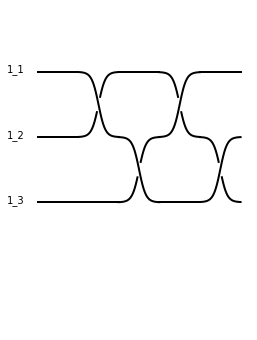

In [27]:
# Drawing the braiding circuit
circuit3.draw_circuit()

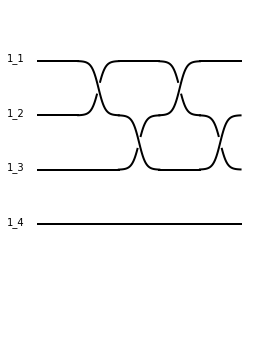

In [28]:
# Drawing the braiding circuit
circuit4.draw_circuit()

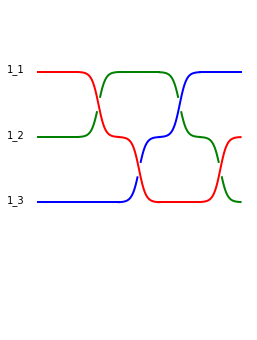

In [29]:
# Highlight given strands with specific colors
circuit3.draw_circuit(colors={"1_1" : 'r', "1_2" : 'g', "1_3" : 'b'})

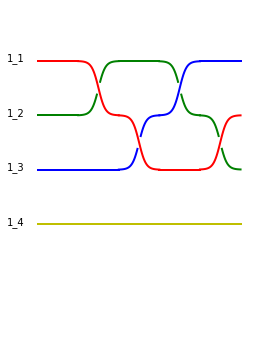

In [30]:
# Highlight given strands with specific colors
circuit4.draw_circuit(colors={"1_1" : 'r', "1_2" : 'g', "1_3" : 'b', "1_4" : 'y'})

In [31]:
# Print the braiding sequence 
circuit3.get_braids_history()
circuit4.get_braids_history()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

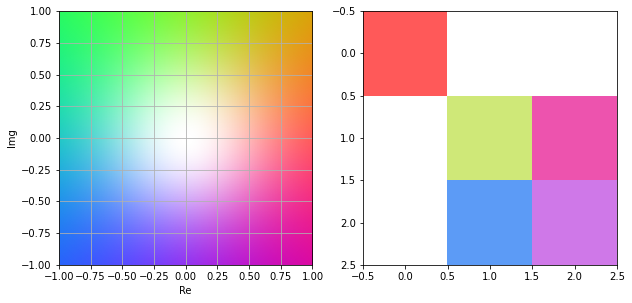

array([[ 1.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ],
       [ 0.        +0.j        ,  0.19098301+0.58778525j,
         0.63600982-0.46208819j],
       [ 0.        +0.j        , -0.63600982-0.46208819j,
         0.19098301-0.58778525j]])

In [32]:
# Get the unitary of the braiding circuit
circuit3.unitary()

In [33]:
# Get the basis
circuit3._basis

[{'qudits': [[1, 0]], 'roots': []},
 {'qudits': [[0, 1]], 'roots': []},
 {'qudits': [[1, 1]], 'roots': []}]

The basis involves the complete set of fusion states including the non-computational states. The general form of the fusion basis is given by the following fusion diagram.



3 anyons fusion state :

        1 1 1 
        \/  / 
        i\ / 
          \    
          j\   

            
This state is represented by Python dict :

        {'qudits': [[i, j]] 'roots': []}


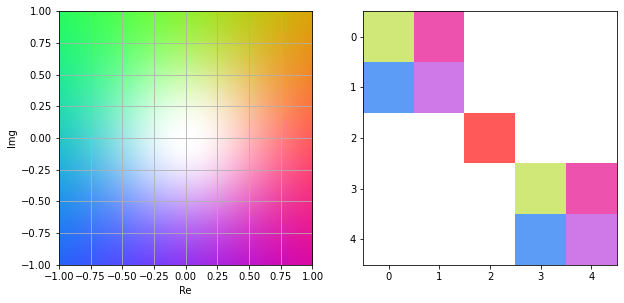

array([[ 0.19098301+0.58778525j,  0.63600982-0.46208819j,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ],
       [-0.63600982-0.46208819j,  0.19098301-0.58778525j,
         0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         1.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        ,  0.19098301+0.58778525j,
         0.63600982-0.46208819j],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , -0.63600982-0.46208819j,
         0.19098301-0.58778525j]])

In [34]:
# Get the unitary of the braiding circuit
circuit4.unitary()

In [35]:
# Get the basis
circuit4._basis

[{'qudits': [[0, 1, 0]], 'roots': []},
 {'qudits': [[1, 1, 0]], 'roots': []},
 {'qudits': [[1, 0, 1]], 'roots': []},
 {'qudits': [[0, 1, 1]], 'roots': []},
 {'qudits': [[1, 1, 1]], 'roots': []}]


4 anyons fusion state :

        1 1 1 1
        \/  / /
        i\ / /
         j\ /   
          k\   

            
This state is represented by Python dict :

        {'qudits': [[i, j, k]] 'roots': []}



In [36]:
# Measure the circuit by fusing all 
circuit3.measure()
circuit4.measure()

In [37]:
# Get the result of measurement in given number of shots for given input state
result3 = circuit3.simulate(input_state=[0, 1, 0], shots=1000)

In [38]:
print(result3)

[2 2 2 2 1 2 1 2 2 1 1 2 2 1 2 1 2 1 2 2 2 2 2 1 1 1 1 1 2 1 2 2 2 1 2 1 2
 2 1 1 2 1 2 2 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 1 2 1
 2 1 2 2 2 1 1 2 2 2 1 1 1 2 1 2 2 1 1 1 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 2
 2 2 2 2 1 2 1 2 1 1 2 2 1 1 1 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 1 1 2 1 1 2 2
 2 1 1 1 2 1 1 2 1 1 1 2 1 1 2 2 2 1 1 1 2 2 2 1 1 2 1 2 2 2 2 2 2 2 2 2 1
 2 2 1 2 1 1 2 2 2 1 1 2 2 1 2 1 2 2 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 2 2 2
 1 2 2 2 2 2 2 2 1 1 1 2 2 2 2 2 2 2 1 2 2 2 1 2 2 2 2 2 1 2 2 2 2 1 2 1 1
 2 1 1 1 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 1 1 1 1 2 2 1 1 1 1 2 1 2 2 1 2 2 2
 2 2 2 1 2 1 2 1 1 1 1 2 2 1 2 2 2 1 2 2 1 1 1 2 1 2 1 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 1 1 2 2 2 1 2 1 1 2 2 1 2 2 1 2 2 2 1 2 1 2 1 2 1 2 2 1 1 1 2 2 2
 1 1 2 1 2 1 2 2 1 2 2 2 1 1 2 1 2 2 2 2 1 1 1 2 2 2 1 1 1 2 2 2 1 2 1 2 1
 2 1 2 1 2 1 2 2 1 2 2 1 2 2 2 1 1 2 1 2 2 2 1 1 1 2 2 1 2 1 2 1 2 2 1 2 2
 2 1 2 1 2 2 2 2 2 1 2 1 2 2 1 2 2 2 1 1 2 1 2 2 1 2 2 1 2 2 1 2 2 2 2 2 2
 1 2 1 2 1 2 2 1 2 1 2 2 

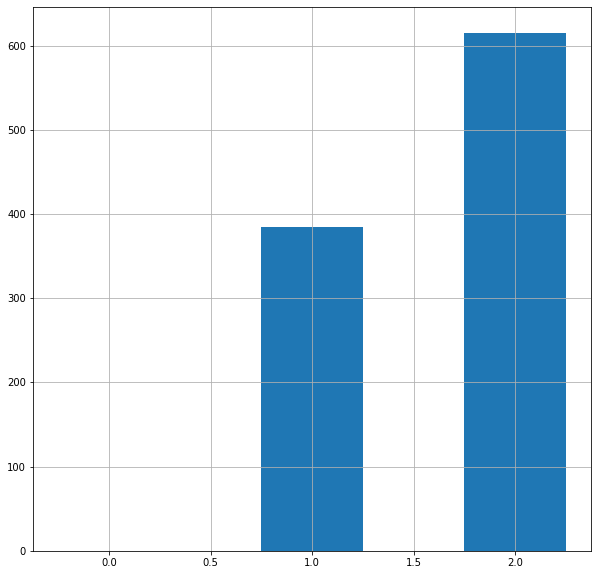

In [39]:
# Show the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result3, [0, 1, 2, 3], align='left', rwidth=0.5)
plt.grid()
plt.show()

In [40]:
# Get the result of measurement in given number of shots for given input state
result4 = circuit4.simulate(input_state=[1, 0, 0, 0, 0], shots=1000)

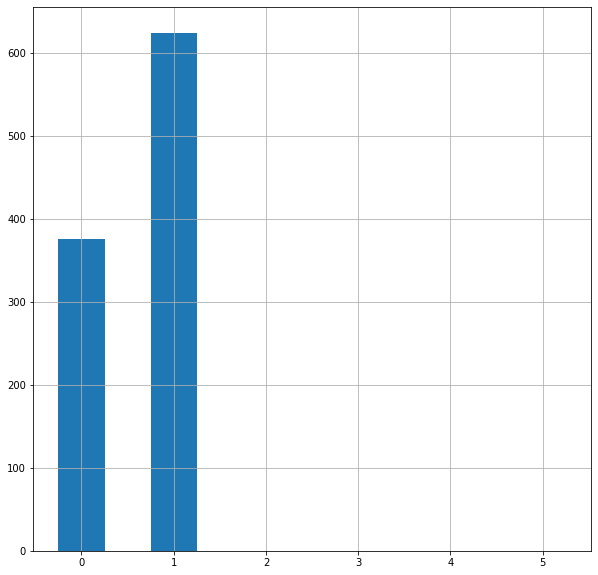

In [41]:
# Show the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result4, [0, 1, 2, 3, 4 , 5, 6], align='left', rwidth=0.5)
plt.grid()
plt.show()

## Multi-Qubit Topological Circuits

    Example: n_qubits = 3, n_anyons_per_qubit = 3
    
        1 1 1 1 1 1 1 1 1
        \/  / \/  / \/  /
        i\ /  k\ /  e\ /
          \     /     /
          j\  l/     /f
            \ /     / 
            m\     /
              \   /
               \ /
               t|
  
    This state is represented by the following Python dict:
    
        {'qudits': [[i, j], [k, l], [e, f]], 'roots': [m, t]}

In [20]:
circuit = AnyonSimulator(n_qubits=2, n_anyons_per_qubit=4)
circuit.braid(1, 2)
circuit.braid(2, 3)
circuit.braid(3, 4)
circuit.braid(4, 5)
circuit.braid(5, 6)

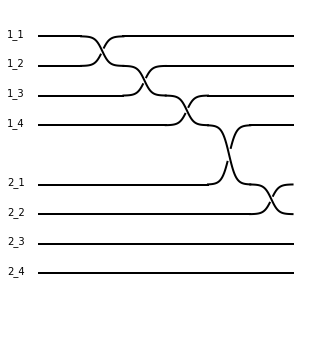

In [21]:
circuit.draw_circuit()

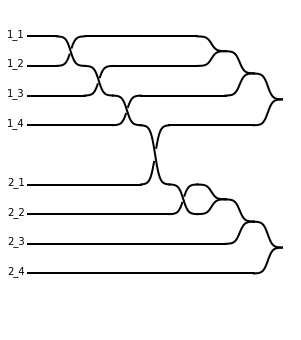

In [22]:
# Measure the fusion circuit
circuit.measure()
circuit.draw_circuit()

In [27]:
# The dimension of basis
circuit._dim

34

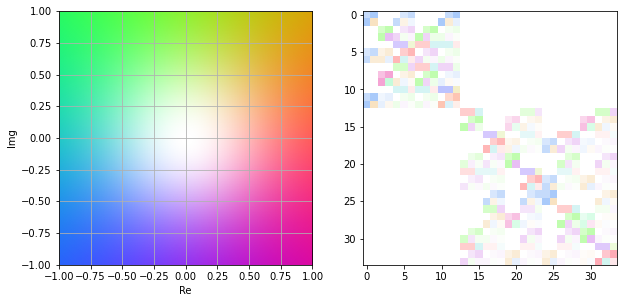

array([[-0.30901699-0.22451399j, -0.39307569-0.2855862j ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [-0.39307569-0.2855862j ,  0.30901699+0.22451399j,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       [ 0.        +0.j        ,  0.        +0.j        ,
        -0.11803399+0.36327126j, ...,  0.        +0.j        ,
         0.        +0.j        ,  0.        +0.j        ],
       ...,
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ..., -0.02786405-0.36327126j,
        -0.02786405-0.36327126j,  0.02190536+0.2855862j ],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j        , ...,  0.        +0.j        ,
         0.39918694-0.05300056j,  0.50777363-0.06741776j],
       [ 0.        +0.j        ,  0.        +0.j        ,
         0.        +0.j       

In [28]:
# The unitary of the circuit
circuit.unitary()

In [27]:
import numpy as np
# Result of measurement
d = circuit._dim
result = circuit.simulate(input_state=[1/np.sqrt(d) for ii in range(d)], shots=1000)

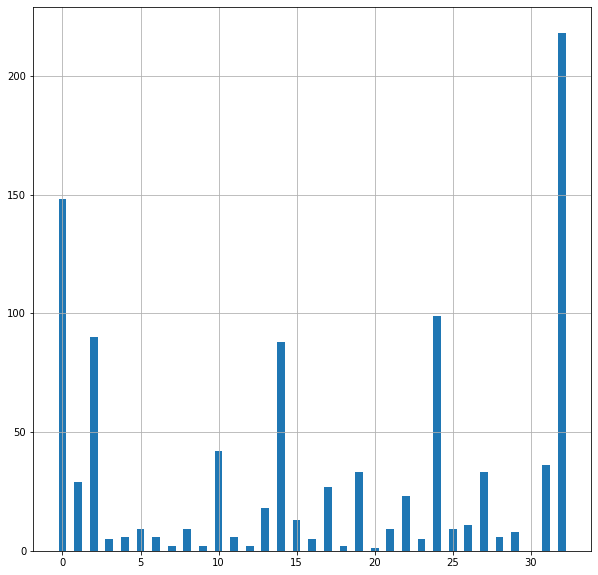

In [28]:
# Show the histogram of measurement results
import matplotlib.pyplot as plt
plt.hist(result, [ii for ii in range(d)], align='left', rwidth=0.5)
plt.grid()
plt.show()